### Selected models

In [369]:
# Upload packages
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
import xgboost as XGBClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import warnings

In [370]:
warnings.filterwarnings("ignore")

In [371]:
Post_selected = pd.read_csv('~/Desktop/Feat_prediction.csv').set_index('External ID')

In [372]:
Post_selected

,BMI,CRP (mg/L),ESR (mm/hr),Height,Total Reads,Weight,Weight_n,consent_age,fecalcal,fecalcal_ng_ml,...,Bowel frequency during the day_09-Jul,Bowel frequency during the day_Unknown,sex_Female,sex_Male,sex_Unknown,smoking status_Current smoker,smoking status_Former smoker,smoking status_Never smoked,smoking status_Unknown,diagnosis
External ID,,,,,,,,,,,,,,,,,,,,,
CSM5FZ4MM,16.945470,9.597698,98.184831,192.000000,5.524543e+07,112.0,24.000000,37.000000,240.090243,19.888863,...,0,0,1,0,0,0,0,1,0,UC
CSM5FZ4MM1,16.456143,40.320708,20.960983,152.000000,3.786562e+07,70.0,53.000000,58.000000,223.285885,317.063094,...,0,0,1,0,0,0,0,0,1,UC
CSM5MCUOM,15.711854,48.569000,36.625684,144.313066,2.553641e+05,64.0,116.000000,67.000000,222.001161,68.541729,...,0,0,0,1,0,0,0,0,1,UC
CSM5MCUOM1,31.439759,11.180201,12.256574,143.666757,6.052792e+06,86.0,98.000000,18.000000,343.835485,175.609929,...,0,0,0,1,0,0,0,0,1,UC
CSM5MCWQM,39.813988,54.326659,28.496137,164.418809,1.043272e+07,103.0,28.000000,43.000000,194.991146,248.368993,...,0,0,0,0,1,0,0,0,1,UC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PSMB4MBSM1,25.104382,0.840428,44.057621,169.000000,5.611575e+07,92.0,77.528729,32.000000,194.538209,59.287025,...,0,0,0,1,0,0,0,1,0,CD
PSMB4MC5M,16.327456,13.047489,91.892652,167.000000,5.457551e+07,19.0,31.000000,25.000000,420.326372,138.643638,...,0,1,1,0,0,0,0,1,0,UC
PSMB4MC5M1,36.369043,9.849275,45.065309,118.000000,1.777290e+07,77.0,94.000000,49.000000,153.919317,391.352492,...,0,0,0,0,1,0,0,1,0,UC


In [373]:
Feature = Post_selected.iloc[:,:255]
Target = Post_selected.iloc[:,-1]

train_ratio = 0.75
test_ratio = 0.15
validation_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
X_train, X_test, y_train, y_test = train_test_split(Feature, Target, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data se
X_test, X_val, y_test, y_val= train_test_split(X_test, y_test, test_size=validation_ratio/(validation_ratio + test_ratio))
# X_train, X_test, y_train, y_test = train_test_split(Feature, Target, test_size=0.33, random_state=42)

In [374]:
# feature selection
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty='l1', dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_train = model.transform(X_train)
X_test = model.transform(X_test)
X_val = model.transform(X_val)

Best Model:
DecisionTreeClassifier(class_weight='balanced', max_depth=3, min_samples_leaf=3,
                       min_samples_split=3, random_state=0)


<AxesSubplot: >

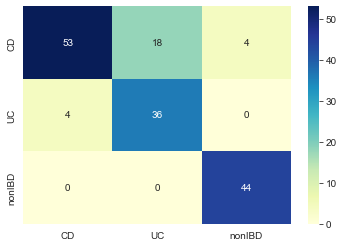

Best Model:
DecisionTreeClassifier(class_weight='balanced', max_depth=3, min_samples_leaf=3,
                       min_samples_split=3, random_state=0)


<AxesSubplot: >

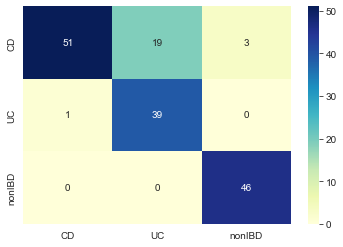

In [375]:
min_samples_split_DT = [3,4,5,6,7,8,9]
min_samples_leaf_DT = [3,4,5,6,7,8,9]
max_depth_DT = [3,4,5,6,7,8,9,10]
max_features_DT = ['sqrt', 'log2', None, 1, 2, 3, 4, 5]

parameters_DT = {#'max_features':max_features_DT,
                'min_samples_split': min_samples_split_DT,
                 'max_depth': max_depth_DT,
                'min_samples_leaf': min_samples_leaf_DT
                }

DT_model = DecisionTreeClassifier(random_state = 0, class_weight="balanced")
DT_clf = GridSearchCV(DT_model, parameters_DT, cv=5, scoring='roc_auc')
DT_clf.fit(X_train, y_train)

print("Best Model:")
DT_model = DT_clf.best_estimator_
print(DT_model)

DT_predictions = DT_model.predict(X_test)

# creating a confusion matrix
labels = np.unique(y_test)
cm_DT = confusion_matrix(y_test, DT_predictions,labels=labels)
cm_DT = pd.DataFrame(cm_DT, index=labels, columns=labels)
sns.heatmap(cm_DT, cmap="YlGnBu", annot=True)

Best Model:
LogisticRegression(C=0.0001, random_state=0)


<AxesSubplot: >

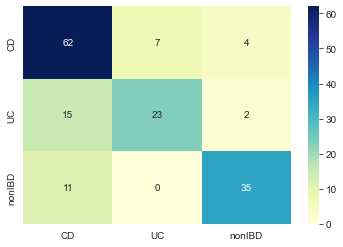

In [376]:
penalty_list_LR = ['l2']
regularization_list_LR = [i for i in np.logspace(-4,2,15)]
parameters_LR = {'penalty':penalty_list_LR,
                'C': regularization_list_LR}

LR_model = LogisticRegression(class_weight = 'balanced')
LR_clf = GridSearchCV(LR_model, parameters_LR, cv=5, scoring="roc_auc")

LR_model = LogisticRegression(C=0.01, penalty='l1', random_state=0)
LR_clf = GridSearchCV(LR_model, parameters_LR, cv=5, scoring='roc_auc')
LR_clf.fit(X_train, y_train)

print("Best Model:")
LR_model = LR_clf.best_estimator_
print(LR_model)

LR_predictions = LR_model.predict(X_test)

# creating a confusion matrix
labels = np.unique(y_test)
cm_LR = confusion_matrix(y_test, LR_predictions,labels=labels)
cm_LR = pd.DataFrame(cm_LR, index=labels, columns=labels)
sns.heatmap(cm_LR, cmap="YlGnBu", annot=True)

Best Model:
GaussianNB(var_smoothing=1e-12)


<AxesSubplot: >

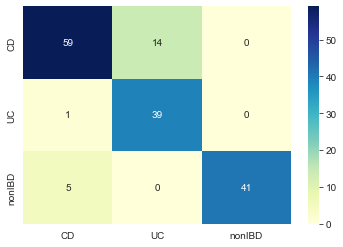

In [377]:
from sklearn.naive_bayes import GaussianNB

var_smooth_NB = [i for i in np.logspace(-12,-6,20)]

parameters_NB = {'var_smoothing':var_smooth_NB}

NB_model = GaussianNB()
NB_clf = GridSearchCV(NB_model, parameters_NB, cv=5, scoring="roc_auc")

NB_clf.fit(X_train, y_train)

print("Best Model:")
NB_model = NB_clf.best_estimator_
print(NB_model)

NB_predictions = NB_model.predict(X_test)

# creating a confusion matrix
labels = np.unique(y_test)
cm_NB = confusion_matrix(y_test, NB_predictions,labels=labels)
cm_NB = pd.DataFrame(cm_NB, index=labels, columns=labels)
sns.heatmap(cm_NB, cmap="YlGnBu", annot=True)

Best Model:
LinearSVC(C=0.0001, class_weight='balanced', multi_class='crammer_singer',
          penalty='l1')


<AxesSubplot: >

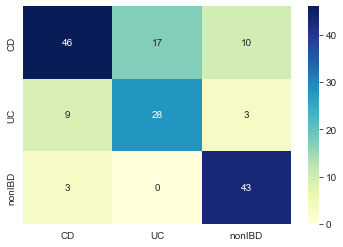

In [378]:
penalty_list_SVC = ['l1','l2']
regularization_list_SVC = [i for i in np.logspace(-4,-1,15)]
parameters_SVC = {'penalty':penalty_list_SVC,
                'C': regularization_list_SVC}

SVC_model = LinearSVC(class_weight = 'balanced', multi_class="crammer_singer")
SVC_clf = GridSearchCV(SVC_model, parameters_SVC, cv=5, scoring="roc_auc")

SVC_clf.fit(X_train, y_train)

print("Best Model:")
SVC_model = SVC_clf.best_estimator_
print(SVC_model)

SVC_predictions = SVC_model.predict(X_test)

# creating a confusion matrix
labels = np.unique(y_test)
cm_SVC = confusion_matrix(y_test, SVC_predictions,labels=labels)
cm_SVC = pd.DataFrame(cm_SVC, index=labels, columns=labels)
sns.heatmap(cm_SVC, cmap="YlGnBu", annot=True)

Best Model:
KNeighborsClassifier(n_neighbors=2)


<AxesSubplot: >

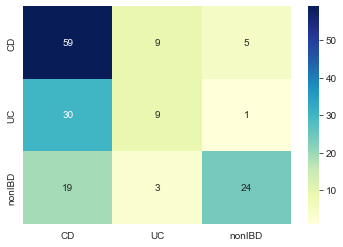

In [379]:
nneighbors_KNN = [i+2 for i in range(10)]
weights_list_KNN = ['uniform', 'distance']
parameters_KNN = {'n_neighbors':nneighbors_KNN,
                'weights': weights_list_KNN}
KNN_model = KNeighborsClassifier()
KNN_clf = GridSearchCV(KNN_model, parameters_KNN, cv=5, scoring="roc_auc")

KNN_clf.fit(X_train, y_train)

print("Best Model:")
KNN_model = KNN_clf.best_estimator_
print(KNN_model)

KNN_predictions = KNN_model.predict(X_test)

# creating a confusion matrix
labels = np.unique(y_test)
cm_KNN = confusion_matrix(y_test, KNN_predictions,labels=labels)
cm_KNN = pd.DataFrame(cm_KNN, index=labels, columns=labels)
sns.heatmap(cm_KNN, cmap="YlGnBu", annot=True)

Best Model:
RandomForestClassifier(max_features=None, n_estimators=50, random_state=0)


<AxesSubplot: >

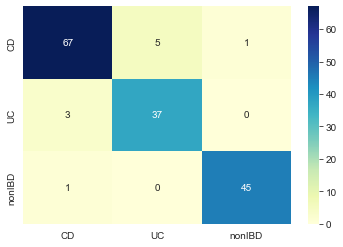

In [380]:
n_estimators_RF = [50, 100, 250, 500, 1000]
max_features_RF = [ None]
parameters_RF = {'n_estimators': n_estimators_RF,
                'max_features': max_features_RF}

RF_model = RandomForestClassifier(max_depth=None,
                                  min_samples_split=2, random_state=0)
RF_clf = GridSearchCV(RF_model, parameters_RF, cv=5, scoring="roc_auc")

RF_clf.fit(X_train, y_train)

print("Best Model:")
RF_model = RF_clf.best_estimator_
print(RF_model)

RF_predictions = RF_model.predict(X_test)

# creating a confusion matrix
labels = np.unique(y_test)
cm_RF = confusion_matrix(y_test, RF_predictions,labels=labels)
cm_RF = pd.DataFrame(cm_RF, index=labels, columns=labels)
sns.heatmap(cm_RF, cmap="YlGnBu", annot=True)

Best Model:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)


<AxesSubplot: >

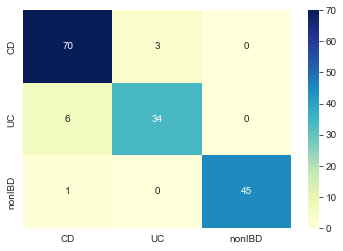

In [381]:
le = LabelEncoder()
y_train_ = le.fit_transform(y_train)
mapping = dict(zip(le.classes_, range(0, len(le.classes_)+1)))
mapping = {v: k for k, v in mapping.items()}
parameters_XB = {}

XB_model = XGBClassifier.XGBClassifier( random_state=0)
XB_clf = GridSearchCV(XB_model, parameters_XB, scoring="roc_auc")

XB_clf.fit(X_train, y_train_)

print("Best Model:")
XB_model = XB_clf.best_estimator_
print(XB_model)

XB_predictions = XB_model.predict(X_test)
XB_predictions = pd.DataFrame(XB_predictions)
XB = XB_predictions[0].replace(mapping)

# creating a confusion matrix
labels = np.unique(y_test)
NXB = XB.to_numpy()
cm_XB = confusion_matrix(list(y_test),list(NXB),labels=labels)
cm_XB = pd.DataFrame(cm_XB, index=labels, columns=labels)
sns.heatmap(cm_XB, cmap="YlGnBu", annot=True)

Best Model:
MLPClassifier(alpha=0.1, hidden_layer_sizes=(10, 10), random_state=1,
              solver='lbfgs')


<AxesSubplot: >

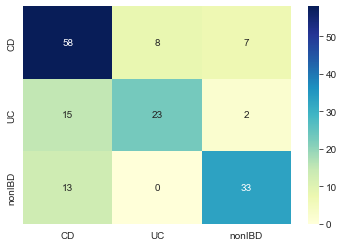

In [382]:
alpha_MLP = [i for i in 10.0 ** -np.arange(1,7)]
hidden_layer_sizes_MLP = [(10,10), (20,20), (40,40),
                     (10,20),(10,40),(20,10), (40,10)]
parameters_MLP = {'alpha': alpha_MLP,
                 'hidden_layer_sizes': hidden_layer_sizes_MLP}

MLP_model = MLPClassifier(solver='lbfgs',
                    random_state=1)
MLP_clf = GridSearchCV(MLP_model, parameters_MLP, cv=5, scoring="roc_auc")

MLP_clf.fit(X_train, y_train)

print("Best Model:")
MLP_model = MLP_clf.best_estimator_
print(MLP_model)

MLP_predictions = MLP_model.predict(X_test)

# creating a confusion matrix
labels = np.unique(y_test)
cm_MLP = confusion_matrix(y_test, MLP_predictions,labels=labels)
cm_MLP = pd.DataFrame(cm_MLP, index=labels, columns=labels)
sns.heatmap(cm_MLP, cmap="YlGnBu", annot=True)

Best Model:
MLPClassifier(alpha=0.1, hidden_layer_sizes=(20, 100, 100, 20), random_state=1,
              solver='lbfgs')


<AxesSubplot: >

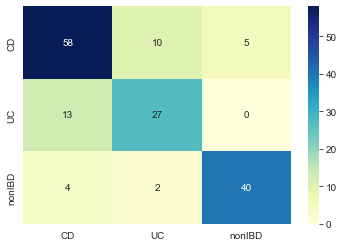

In [383]:
alpha_MLP = [i for i in 10.0 ** -np.arange(1,7)]

parameters_MLP = {'alpha': alpha_MLP}

MLP_model = MLPClassifier(solver='lbfgs',
                    random_state=1, hidden_layer_sizes=(20,100,100,20))
MLP_clf = GridSearchCV(MLP_model, parameters_MLP, cv=5, scoring="roc_auc")

MLP_clf.fit(X_train, y_train)

print("Best Model:")
MLP_model = MLP_clf.best_estimator_
print(MLP_model)

MLP_predictions = MLP_model.predict(X_test)

# creating a confusion matrix
cm_MLP = confusion_matrix(y_test, MLP_predictions)

labels = np.unique(y_test)
cm_MLP = confusion_matrix(y_test, MLP_predictions,labels=labels)
cm_MLP = pd.DataFrame(cm_MLP, index=labels, columns=labels)
sns.heatmap(cm_MLP, cmap="YlGnBu", annot=True)

In [412]:
allclf_train = pd.DataFrame({'diagnosis':y_train})

allclf_train['DT'] = DT_clf.best_estimator_.predict(X_train)
allclf_train['KNN'] = KNN_clf.best_estimator_.predict(X_train)
allclf_train['SVC'] = SVC_clf.best_estimator_.predict(X_train)
allclf_train['LR'] = LR_clf.best_estimator_.predict(X_train)
allclf_train['NB'] = NB_clf.best_estimator_.predict(X_train)
allclf_train['RF'] = RF_clf.best_estimator_.predict(X_train)
allclf_train['XGB'] = XB_clf.best_estimator_.predict(X_train)
allclf_train['XGB'] = allclf_train['XGB'].replace(mapping)
allclf_train['MLP'] = MLP_clf.best_estimator_.predict(X_train)
allclf_train

,diagnosis,DT,KNN,SVC,LR,RF,NB,XGB,MLP
External ID,,,,,,,,,
HSM7J4OEM1,CD,CD,CD,CD,CD,CD,CD,CD,CD
HSMA33JDM1,CD,nonIBD,CD,CD,CD,CD,nonIBD,CD,CD
PSMA269OM1,CD,CD,CD,CD,CD,CD,CD,CD,CD
CSM79HGPM1,CD,CD,CD,UC,CD,CD,CD,CD,CD
PSM6XBSUM1,CD,CD,CD,nonIBD,nonIBD,CD,CD,CD,CD
...,...,...,...,...,...,...,...,...,...
PSM7J14TM1,CD,CD,CD,CD,CD,CD,CD,CD,CD
HSM5MD62M1,CD,CD,CD,UC,UC,CD,CD,CD,CD
MSMB4LZ8M1,nonIBD,nonIBD,CD,nonIBD,nonIBD,nonIBD,nonIBD,nonIBD,nonIBD


In [413]:
allclf_test = pd.DataFrame({'diagnosis':y_test})

allclf_test['DT'] = DT_clf.best_estimator_.predict(X_test)
allclf_test['KNN'] = KNN_clf.best_estimator_.predict(X_test)
allclf_test['SVC'] = SVC_clf.best_estimator_.predict(X_test)
allclf_test['LR'] = LR_clf.best_estimator_.predict(X_test)
allclf_test['NB'] = NB_clf.best_estimator_.predict(X_test)
allclf_test['RF'] = RF_clf.best_estimator_.predict(X_test)
allclf_test['XGB'] = XB_clf.best_estimator_.predict(X_test)
allclf_test['XGB'] = allclf_test['XGB'].replace(mapping)
allclf_test['MLP'] = MLP_clf.best_estimator_.predict(X_test)
allclf_test

,diagnosis,DT,KNN,SVC,LR,NB,RF,XGB,MLP
External ID,,,,,,,,,
CSM9X1YVM1,CD,CD,nonIBD,nonIBD,nonIBD,CD,CD,CD,CD
CSM5MCZFM,CD,UC,CD,UC,UC,UC,CD,CD,CD
MSM79HDMM1,CD,CD,UC,nonIBD,CD,CD,CD,CD,UC
HSM7J4KKM,nonIBD,nonIBD,CD,CD,CD,nonIBD,nonIBD,CD,CD
CSM5MCXLM,UC,UC,CD,UC,UC,UC,UC,UC,CD
...,...,...,...,...,...,...,...,...,...
HSM67VEUM,nonIBD,nonIBD,CD,nonIBD,nonIBD,nonIBD,nonIBD,nonIBD,nonIBD
CSM67UEIM,UC,UC,CD,UC,UC,UC,UC,UC,UC
CSM9X1YVM,CD,CD,CD,CD,CD,CD,CD,CD,CD


In [415]:
allclf_train['Consensus'] = allclf_train[['DT', 'KNN', 'SVC', 'LR','NB', 'RF','XGB', 'MLP']].mode(axis=1).iloc[:,0]
allclf_test['Consensus'] = allclf_test[['DT', 'KNN', 'SVC', 'LR','NB', 'RF','XGB', 'MLP']].mode(axis=1).iloc[:,0]

In [416]:
cm_Consensus_train = confusion_matrix(y_train, allclf_train['Consensus'])
cm_Consensus_test = confusion_matrix(y_test, allclf_test['Consensus'])

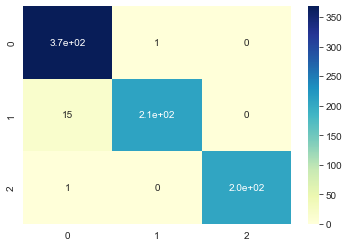

In [417]:
sns.heatmap(cm_Consensus_train, cmap="YlGnBu", annot=True)
plt.show()

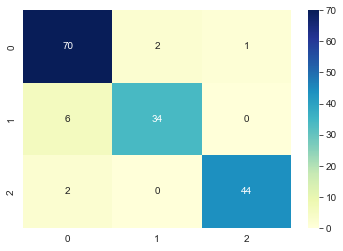

In [418]:
sns.heatmap(cm_Consensus_test, cmap="YlGnBu", annot=True)
plt.show()

In [419]:
allclf_test.shape

(159, 10)

In [431]:
validation_metric = pd.DataFrame(index =['Score'])
validation_metric['DT'] = f'{round(roc_auc_score(y_test, DT_clf.predict_proba(X_test), multi_class="ovr")*100,2)}%'
validation_metric['KNN'] = f'{round(roc_auc_score(y_test, KNN_clf.predict_proba(X_test), multi_class="ovr")*100,2)}%'
validation_metric['LR'] = f'{round(roc_auc_score(y_test, LR_clf.predict_proba(X_test), multi_class="ovr")*100,2)}%'
validation_metric['NB'] = f'{round(roc_auc_score(y_test, NB_clf.predict_proba(X_test), multi_class="ovr")*100,2)}%'
validation_metric['RF'] = f'{round(roc_auc_score(y_test, RF_clf.predict_proba(X_test), multi_class="ovr")*100,2)}%'
validation_metric['XGB'] = f'{round(roc_auc_score(y_test, XB_clf.predict_proba(X_test), multi_class="ovr")*100,2)}%'
validation_metric['MLP'] = f'{round(roc_auc_score(y_test, MLP_clf.predict_proba(X_test), multi_class="ovr")*100,2)}%'
validation_metric.T

,Score
DT,93.27%
KNN,76.22%
LR,89.7%
NB,97.19%
RF,98.02%
XGB,99.15%
MLP,91.49%


In [427]:
y_pred_DT = DT_model.predict(X_val)
y_pred_KNN = KNN_model.predict(X_val)
y_pred_SVC = SVC_model.predict(X_val)
y_pred_LR = LR_model.predict(X_val)
y_pred_NB = NB_model.predict(X_val)
y_pred_RF = RF_model.predict(X_val)
y_pred_XGB = XB_model.predict(X_val)
y_pred_MLP = MLP_model.predict(X_val)

In [422]:
allclf_CV = pd.DataFrame({'diagnosis':y_val})
allclf_CV['DT_CV'] = y_pred_DT
allclf_CV['KNN_CV'] = y_pred_KNN
allclf_CV['SVC_CV'] = y_pred_SVC
allclf_CV['LR_CV'] = y_pred_LR
allclf_CV['NB_CV'] = y_pred_NB
allclf_CV['RF_CV'] = y_pred_RF
allclf_CV['XGB_CV'] = y_pred_XGB
allclf_CV['XGB_CV'] = allclf_CV['XGB_CV'].replace(mapping)
allclf_CV['MLP_CV'] = y_pred_MLP
allclf_CV

,diagnosis,DT_CV,KNN_CV,SVC_CV,LR_CV,NB_CV,RF_CV,XGB_CV,MLP_CV
External ID,,,,,,,,,
MSM6J2IEM,CD,CD,CD,CD,CD,CD,CD,CD,CD
HSM6XRVMM1,CD,UC,CD,UC,UC,UC,UC,CD,CD
HSM7J4MKM,CD,CD,CD,UC,UC,CD,CD,CD,UC
PSM7J19FM1,CD,UC,CD,CD,CD,CD,CD,CD,CD
CSM5MCWQM,UC,UC,CD,CD,CD,UC,UC,UC,CD
...,...,...,...,...,...,...,...,...,...
CSM7KOOFM1,CD,CD,CD,CD,CD,CD,CD,CD,CD
PSM7J14NM1,CD,CD,CD,CD,CD,CD,CD,CD,CD
MSM6J2ROM,nonIBD,nonIBD,nonIBD,nonIBD,nonIBD,nonIBD,nonIBD,nonIBD,nonIBD


In [423]:
print(f'roc_auc_score RF: {round(roc_auc_score(y_val, RF_clf.predict_proba(X_val), multi_class="ovr")*100,2)}%')
print(f'roc_auc_score XGB: {round(roc_auc_score(y_val, XB_clf.predict_proba(X_val), multi_class="ovr")*100,2)}%')

roc_auc_score RF: 96.93%
roc_auc_score XGB: 98.74%


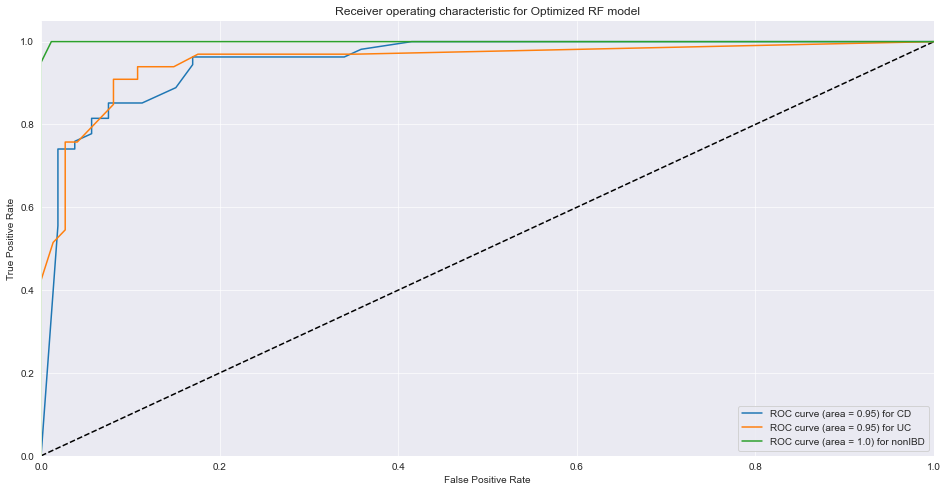

In [437]:
def plot_multiclass_roc(clf, X_val, y_val, model_name, n_classes, figsize=(12, 6)):
    y_score = clf.predict_proba(X_val)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_val, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'Receiver operating characteristic for Optimized {model_name} model')
    labels = np.unique(y_val)
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label=f'ROC curve (area = {round(roc_auc[i],2)}) for {labels[i]}')
    ax.legend(loc="best")
    ax.grid(alpha=.8)
    sns.despine()
    plt.show()
    return fig

RF_model_optimized_roc_auc_curve = plot_multiclass_roc(RF_clf, X_val, y_val, 'RF', n_classes=3, figsize=(16, 8))

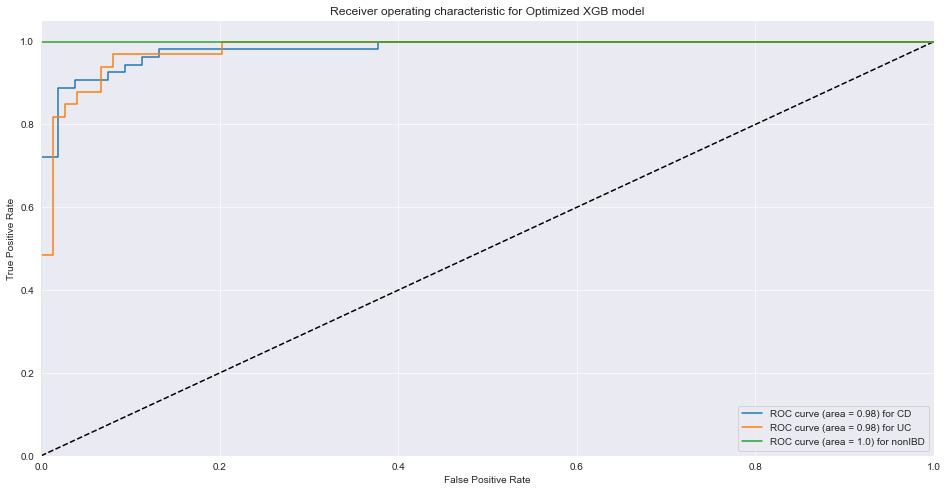

In [439]:
XGB_model_optimized_roc_auc_curve = plot_multiclass_roc(XB_clf, X_val, y_val, 'XGB', n_classes=3, figsize=(16, 8))